In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import dates
from datetime import datetime

In [2]:
seed = 0
np.random.seed(seed)
pd.core.common.random_state(seed)

RandomState(MT19937) at 0x7F6012C5CA40

In [3]:
def get_date(day_of_week):
    for d in pd.date_range(start='2023-10-02', end='2023-10-8', freq='D'):
        if d.dayofweek==int(day_of_week)-1:
            return d.date()
    return None

# Times series
# source: https://raw.githubuserconte.ipynb_checkpoints/t.com/HypnosPy/HypnosPy/master/data/examples_mesa/mesa-sample.csv
data = pd.read_csv('../../data/mesa-sample.csv')
data['date'] = data.dayofweek.apply(lambda d:get_date(d))
data['datetime'] = data.apply(lambda row: f"{row['date']} {row['linetime'].zfill(8)}", axis=1)
data['datetime'] = data.apply(lambda row: pd.to_datetime(row['datetime'], format='%Y-%m-%d %H:%M:%S'), axis=1)
data['hour'] = data.datetime.dt.hour

In [4]:
# Circadian in a day
tmp = data.groupby('hour').activity.sum().reset_index()
x1 = [pd.to_datetime(f"{str(h).zfill(2)}:00") for h in tmp.hour.values]
y1 = tmp.activity.values
t1 = 'Daily activity'
f1 = dates.DateFormatter('%H:%M')

In [5]:
# Periodic (circadian in a week)
tmp = data.groupby(['date','hour']).activity.sum().reset_index()
x2 = tmp.apply(lambda row: pd.to_datetime(f"{row.date} {str(row.hour).zfill(2)}:00", format='%Y-%m-%d %H:%M'), axis=1)
y2 = tmp.activity.values
t2 = 'Weekly activity'
f2 = dates.DateFormatter('%a')

In [6]:
# Trend (burstiness)
obs = int(1e7)
seconds_in_day = 24 * 60 * 60
bins = np.arange(0,seconds_in_day+1,1)
x3 = pd.date_range(start='2023-10-27 00:00:00', end='2023-10-28 00:00:00', periods=seconds_in_day)
y3,_ = np.histogram(np.random.laplace(8 * 60 * 60, 0.4 * 60 * 60, obs), bins=bins)
t3 = "Burstiness"
f3 = dates.DateFormatter('%H:%M')

In [7]:
# Trend (periodic, and growing)
# source: https://www.kaggle.com/datasets/chirag19/air-passengers/
df = pd.read_csv("../../data/AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.rename(columns={'#Passengers':'n_passengers', 'Month':'month'}, inplace=True)
x4 = df.month
y4 = df.n_passengers
t4 = "Monthly US airline passengers"
f4 = None

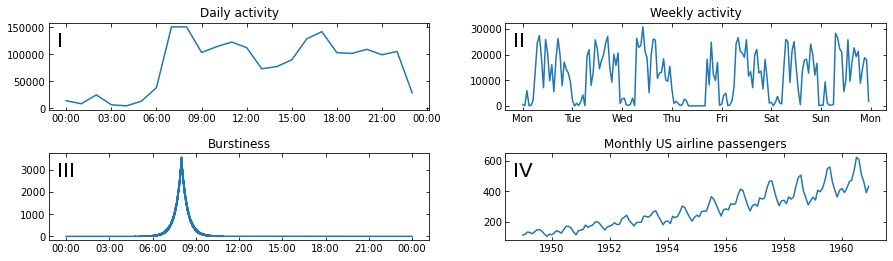

In [8]:
import matplotlib.dates as mdates

datasets = {
    'I': (x1, y1, t1, f1),
    'II': (x2, y2, t2, f2),
    'III': (x3, y3, t3, f3),
    'IV': (x4, y4, t4, f4),
}

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(15, 4),
                        gridspec_kw={'wspace': 0.2, 'hspace': 0.5})

for ax, (label, (x, y, t, f)) in zip(axs.flat, datasets.items()):
    # label
    ax.text(0.02, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    
    # data
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y)
    ax.set_title(t)
    if f:
        ax.xaxis.set_major_formatter(f)
    ax.tick_params(axis='x', labelrotation = 0)
plt.show()